In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime


In [104]:
url = pd.read_csv('https://raw.githubusercontent.com/adhikariprajwal/CovidAnalysis/main/owid-covid-data.csv').dropna()
df_nepal=url.loc[url['location']=='Nepal']
df_nepal.head()
countryNepal = df_nepal

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,24) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [105]:
import seaborn as sb


Here we can see the rate of increase of COVID cases in Nepal is growing exponentially.

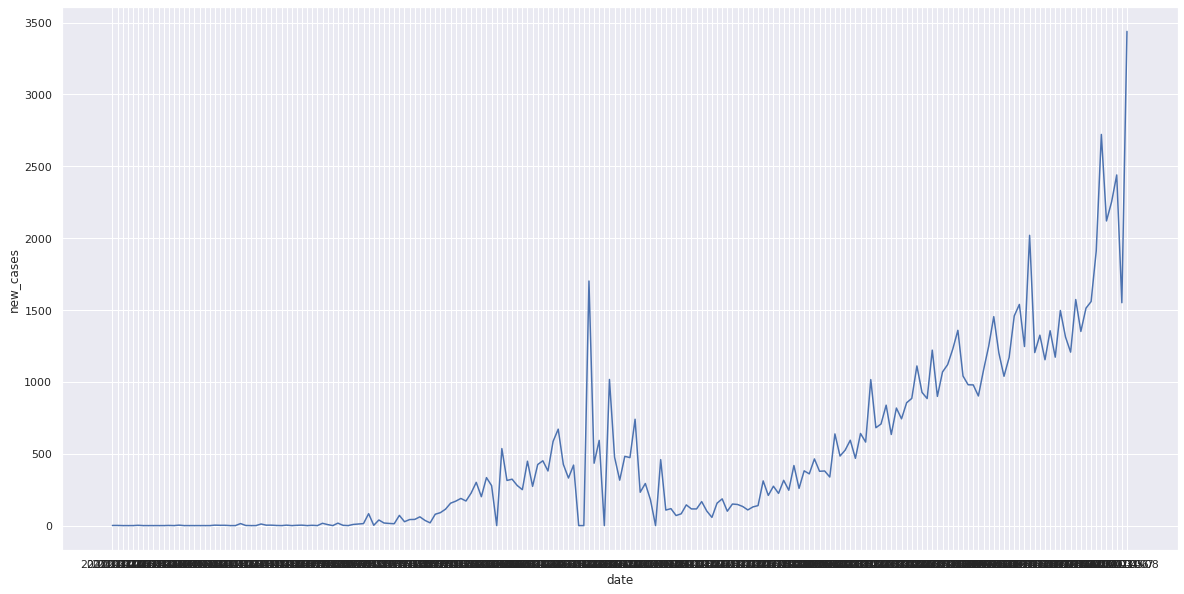

In [106]:
sb.set(rc={'figure.figsize':(20,10)})
sb.lineplot(x = "date", y = "new_cases", data= df_nepal)
plt.show()

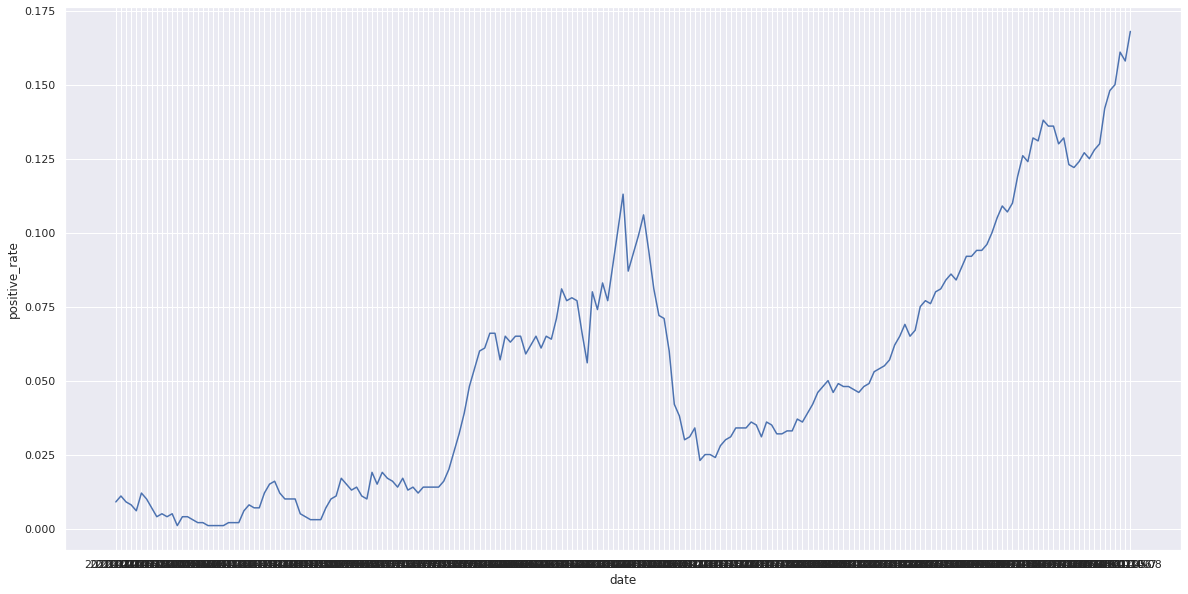

In [107]:
sb.set(rc={'figure.figsize':(20,10)})
sb.lineplot(x = "date", y = "positive Rate", data= df_nepal)
plt.show()

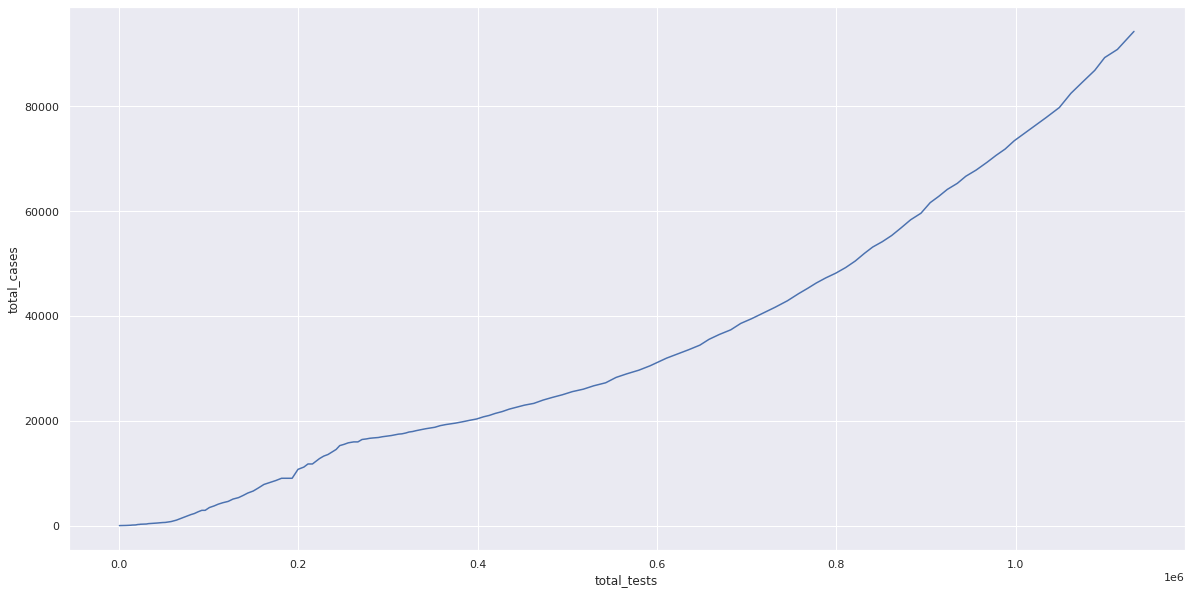

In [108]:
sb.set(rc={'figure.figsize':(20,10)})
sb.lineplot(x = "total Tests", y = "total Cases", data= df_nepal)
plt.show()

In [109]:
df_nepal.mean()

total_cases                        1.998134e+04
new_cases                          4.736281e+02
new_cases_smoothed                 4.363920e+02
total_deaths                       1.027085e+02
new_deaths                         2.904523e+00
new_deaths_smoothed                2.718583e+00
total_cases_per_million            6.857766e+02
new_cases_per_million              1.625530e+01
new_cases_smoothed_per_million     1.497734e+01
total_deaths_per_million           3.525050e+00
new_deaths_per_million             9.967337e-02
new_deaths_smoothed_per_million    9.337186e-02
new_tests                          5.685171e+03
total_tests                        3.308179e+05
total_tests_per_thousand           1.135395e+01
new_tests_per_thousand             1.950553e-01
new_tests_smoothed                 5.465834e+03
new_tests_smoothed_per_thousand    1.875678e-01
tests_per_case                     8.662542e+01
positive_rate                      5.258291e-02
stringency_index                   8.820

In [110]:
df_nepal.drop(['iso_code','new_cases_smoothed','tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index', 'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case','new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'new_tests' ],axis=1, inplace=True)

looking at daily increase in cases of covid wrt date

In [241]:
datewise = df_nepal.groupby(['date']).agg({'total_cases':'sum','total_deaths':'sum','positive_rate':'sum'})
datewise.iloc[-1]

total_cases     94253
total_deaths      578
positive_rate       0
Name: 737706, dtype: float64

In [112]:
df_nepal['date']=pd.to_datetime(df_nepal['date'])
df_nepal['date']

34533   2020-03-24
34534   2020-03-25
34535   2020-03-26
34536   2020-03-27
34537   2020-03-28
           ...    
34727   2020-10-04
34728   2020-10-05
34729   2020-10-06
34730   2020-10-07
34731   2020-10-08
Name: date, Length: 199, dtype: datetime64[ns]

In [113]:
datewise = df_nepal.groupby(['date']).agg({'total_cases':'sum','total_deaths':'sum','positive_rate':'sum'})
datewise

,total_cases,total_deaths,positive_rate
date,,,
2020-03-24,2.0,0.0,0.009
2020-03-25,3.0,0.0,0.011
2020-03-26,3.0,0.0,0.009
2020-03-27,3.0,0.0,0.008
2020-03-28,3.0,0.0,0.006
...,...,...,...
2020-10-04,84570.0,528.0,0.148
2020-10-05,86823.0,535.0,0.150
2020-10-06,89263.0,554.0,0.161


looking for rate of covid in total_cases, total_deaths, positive_rate

Text(0, 0.5, 'Cases')

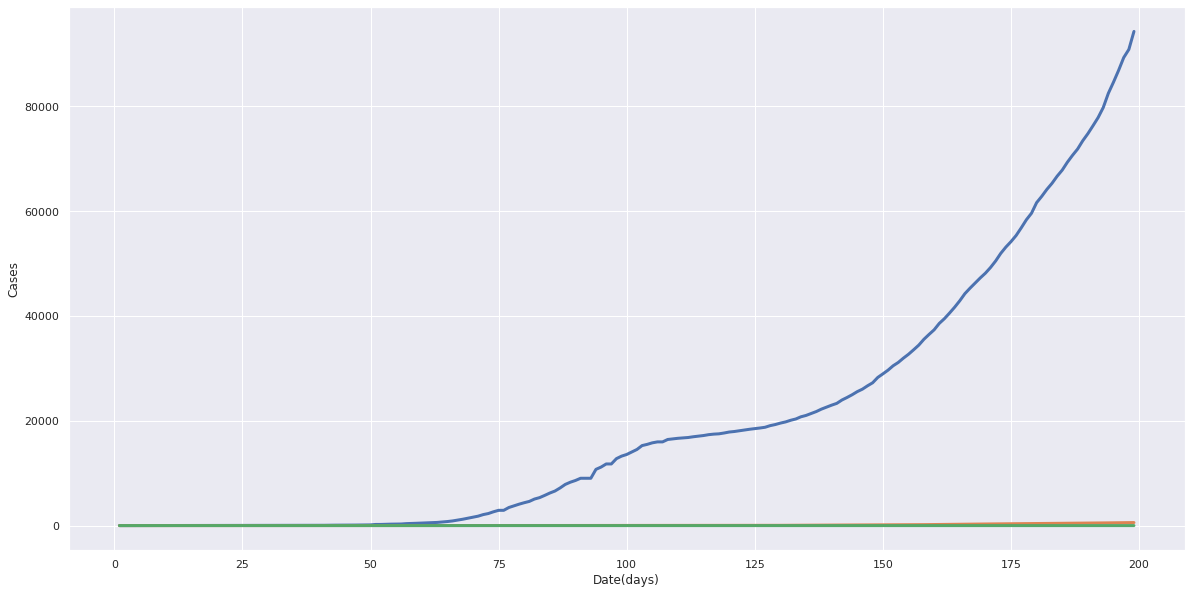

In [114]:
datewise['date']=datewise.index.date
date_total=[]
case_total=[]
death_total=[]
positive_total=[]
date=1
for i in list(datewise['date'].unique()):
    case_total.append(datewise[datewise['date']==i]['total_cases'].iloc[-1])
    death_total.append(datewise[datewise['date']==i]['total_deaths'].iloc[-1])
    positive_total.append(datewise[datewise['date']==i]['positive_rate'].iloc[-1])
    date_total.append(date)
    date=date+1
plt.plot(date_total, case_total, linewidth=3)
plt.plot(date_total, death_total, linewidth=3)
plt.plot(date_total, positive_total, linewidth=3)
plt.xlabel('Date(days)')
plt.ylabel('Cases')


counting no of days and confirmed cases from the data

In [115]:
TotalNepal = df_nepal['total_cases'].max()
print('In',df_nepal[df_nepal['total_cases']>0].shape[0],'days, Covid reaches',TotalNepal, 'confirm cases in Nepal')

In 199 days, Covid reaches 94253.0 confirm cases in Nepal


Predicting data using Linear Regression Model

In [161]:
from sklearn.linear_model import LinearRegression as lr
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [154]:
df_nepal['date'] = pd.to_datetime(df_nepal['date'])
df_nepal['date'] = df_nepal['date'].map(datetime.datetime.toordinal)
df_nepal.head()

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_tests,positive_rate
34533,Asia,Nepal,737508,2,1,0,0,610,0
34534,Asia,Nepal,737509,3,1,0,0,687,0
34535,Asia,Nepal,737510,3,0,0,0,758,0
34536,Asia,Nepal,737511,3,0,0,0,802,0
34537,Asia,Nepal,737512,3,0,0,0,875,0


In [156]:
x = df_nepal['date']
y = df_nepal['total_cases']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

In [157]:
linear_reg = lr()

In [158]:
linear_reg.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [159]:
df_nepal.tail()

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_tests,positive_rate
34727,Asia,Nepal,737702,84570,2120,528,8,1074448,0
34728,Asia,Nepal,737703,86823,2253,535,7,1088229,0
34729,Asia,Nepal,737704,89263,2440,554,19,1099276,0
34730,Asia,Nepal,737705,90814,1551,563,9,1113485,0
34731,Asia,Nepal,737706,94253,3439,578,15,1131958,0


In [160]:
y_pred = linear_reg.predict(np.array(x_test).reshape(-1,1))

In [163]:
mean_squared_error(x_test,y_pred)

514103288424.75104

In [197]:
linear_reg.predict(np.array([[737706]]))

array([[55582.12575483]])

In [184]:
df = pd.read_csv('https://raw.githubusercontent.com/adhikariprajwal/CovidAnalysis/main/owid-covid-data.csv').dropna()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,24) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


experimenting with facebook prophet module

In [202]:
from fbprophet import Prophet

new=df.groupby('date').sum()['new_deaths_per_million'].reset_index()
new.columns=['ds','y']
new['ds']=pd.to_datetime(new['ds'])

In [212]:
m = Prophet(interval_width=0.95)
m.fit(new)
future_new= m.make_future_dataframe(periods=10)
forecast_newcases = m.predict(future_new)
forecast_newcases[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
225,2020-10-17,6,1,11
226,2020-10-18,5,0,10
227,2020-10-19,5,-0,10
228,2020-10-20,5,-0,9
229,2020-10-21,7,1,12


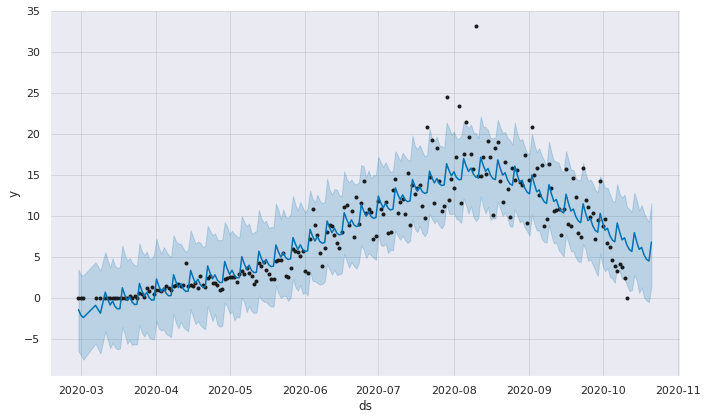

In [216]:

NewCasePlot1 = m.plot(forecast_newcases)

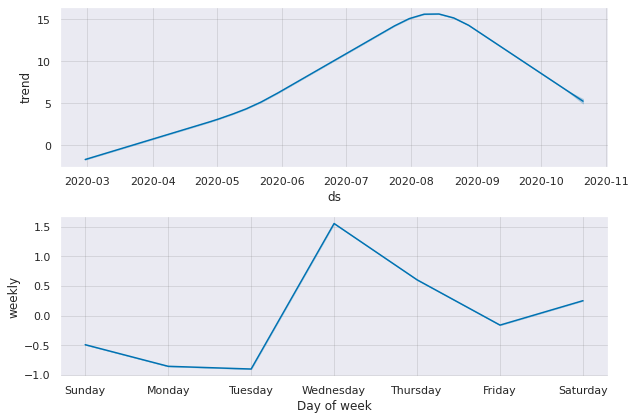

In [217]:
NewCasePlot2 = m.plot_components(forecast_newcases)

Looking the World at glance : Top countries with highest covid cases

In [226]:
df = pd.read_csv('https://raw.githubusercontent.com/adhikariprajwal/CovidAnalysis/main/owid-covid-data.csv').dropna()
topCountries = df.groupby('location')['new_cases'].sum().reset_index().sort_values('new_cases', ascending = False)[:10]
print(topCountries)


              location  new_cases
5                India    6138042
10              Mexico     748315
16        South Africa     688118
0           Bangladesh     370940
14            Pakistan     312636
6            Indonesia     251944
7           Kazakhstan     130339
1   Dominican Republic     102689
13               Nepal      94252
3             Ethiopia      83413


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (1,24) have mixed types.Specify dtype option on import or set low_memory=False.



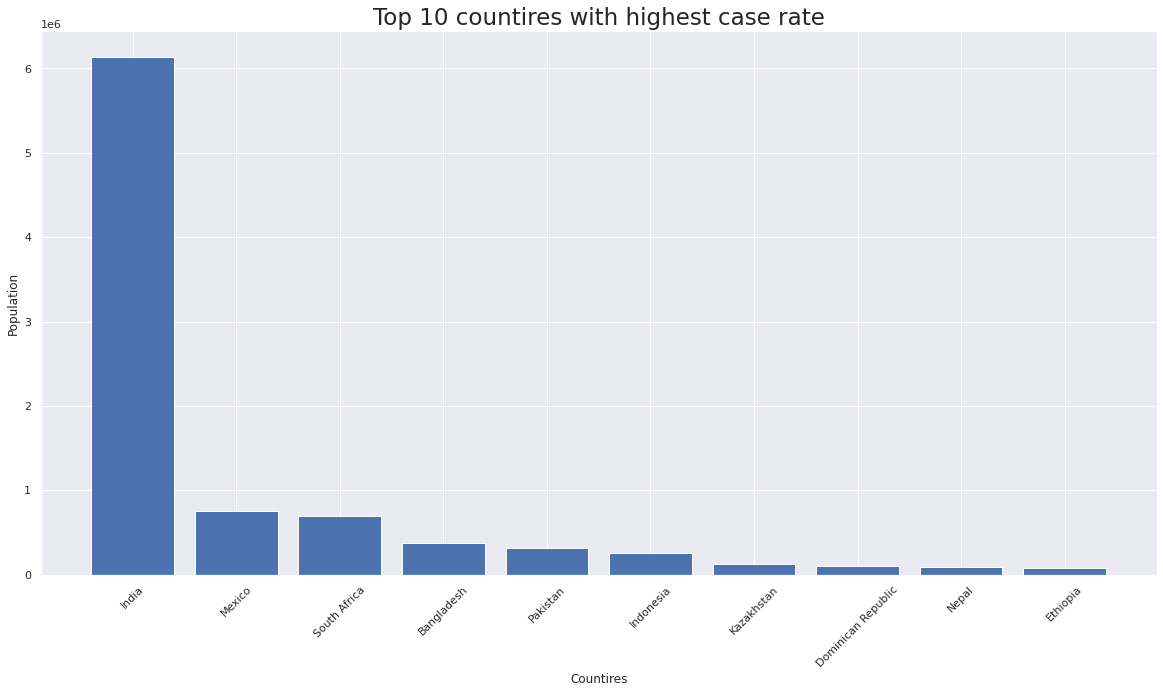

In [228]:
plt.figure()
plt.bar(topCountries['location'], topCountries['new_cases'])
plt.title("Top 10 countires with highest case rate", fontsize =23)
plt.xticks(rotation = 45)
plt.xlabel("Countires")
plt.ylabel("Population")
plt.show()

Looking for  relationship between population density with covid cases

In [229]:
df = pd.read_csv('https://raw.githubusercontent.com/adhikariprajwal/CovidAnalysis/main/owid-covid-data.csv').dropna()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (1,24) have mixed types.Specify dtype option on import or set low_memory=False.



In [238]:
casesDensity = df.groupby('location')[['new_cases','population_density']].agg({'new_cases': 'sum', 'population_density': lambda x:x.unique()})
casesDensity_sort = casesDensity.sort_values('population_density', ascending = False).reset_index()
casesDensity_sort[['new_cases','population_density']] = (casesDensity_sort[['new_cases','population_density']] - casesDensity_sort[['new_cases','population_density']].min()) /(casesDensity_sort[['new_cases','population_density']].max() - casesDensity_sort[['new_cases','population_density']].min())
print(casesDensity_sort.head(10))

             location  new_cases  population_density
0          Bangladesh          0                   1
1               India          1                   0
2             Vietnam          0                   0
3         El Salvador          0                   0
4            Pakistan          0                   0
5  Dominican Republic          0                   0
6              Uganda          0                   0
7               Nepal          0                   0
8              Malawi          0                   0
9           Indonesia          0                   0


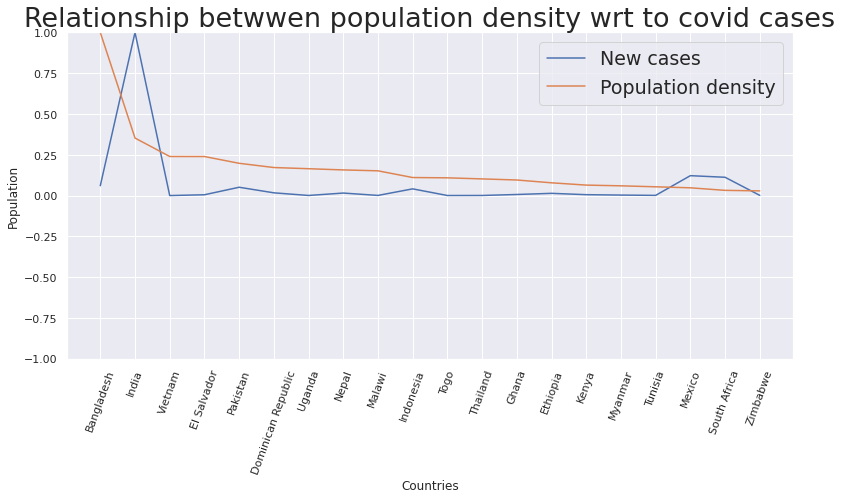

In [240]:
plt.figure(figsize = (13, 6))
plt.plot(casesDensity_sort['location'][:20], casesDensity_sort['new_cases'][:20], label="New cases")
plt.plot(casesDensity_sort['location'][:20], casesDensity_sort['population_density'][:20], label="Population density")
plt.xticks(rotation = '70')
plt.gca().set_ylim([-1, 1])
plt.xlabel('Countries')
plt.ylabel("Population")
plt.title("Relationship betwwen population density wrt to covid cases", fontsize = 27)
plt.legend(fontsize = 19)
plt.show()